In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
con = pd.read_csv('concrete.csv')

In [3]:
con.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
con.shape

(1030, 9)

In [5]:
con.columns = ['Cement', 'BlastFur','Flyash','Water', 'Superplastic','CoarsAgg', 'FinAgg', 'Age','ConStr']

In [6]:
con.head()

,Cement,BlastFur,Flyash,Water,Superplastic,CoarsAgg,FinAgg,Age,ConStr
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [7]:
con.isnull().sum()

Cement          0
BlastFur        0
Flyash          0
Water           0
Superplastic    0
CoarsAgg        0
FinAgg          0
Age             0
ConStr          0
dtype: int64

In [8]:
x= con.iloc[:,:-1]
y= con.iloc[:,-1]

In [9]:
x_temp, x_test, y_temp, y_test = train_test_split(x,y, test_size=0.3, random_state=5)
x_train, x_val, y_train, y_val = train_test_split(x_temp,y_temp, test_size=0.3, random_state=5)

In [10]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

print('Training:\t',linreg.score(x_train,y_train))
print('Validation :\t',linreg.score(x_val,y_val))
print('Testing : \t', linreg.score(x_test,y_test))

Training:	 0.611738890189844
Validation :	 0.612087396234388
Testing : 	 0.6087828420864401


In [11]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is\t\t {}".format(col_name, linreg.coef_[idx]))

The coefficient for Cement is		 0.1143730063939903
The coefficient for BlastFur is		 0.10159311578384284
The coefficient for Flyash is		 0.07440775437281232
The coefficient for Water is		 -0.1672361493223915
The coefficient for Superplastic is		 0.4187261026586431
The coefficient for CoarsAgg is		 0.022761747636501815
The coefficient for FinAgg is		 0.015973383131868933
The coefficient for Age is		 0.10636587300638228


In [12]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [13]:
from sklearn import preprocessing

x_train_scal = preprocessing.scale(x_train)
x_val_scal = preprocessing.scale(x_val)
x_test_scal = preprocessing.scale(x_test)

ridge = Ridge(alpha=0.3)
ridge.fit(x_train_scal,y_train)

print('Training :\t',ridge.score(x_train_scal, y_train))
print('Validation :\t',ridge.score(x_val_scal,y_val))
print('Testing : \t', ridge.score(x_test_scal, y_test))

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


Training :	 0.6117339186915596
Validation :	 0.6114181910813626
Testing : 	 0.6159223474268003


In [14]:
lasso = Lasso(alpha=0.3)

lasso.fit(x_train,y_train)

print('Training :\t',lasso.score(x_train, y_train))
print('Validation :\t',lasso.score(x_val,y_val))
print('Testing : \t', lasso.score(x_test, y_test))

Training :	 0.6117157538493402
Validation :	 0.6128599869045415
Testing : 	 0.6091611524118978


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


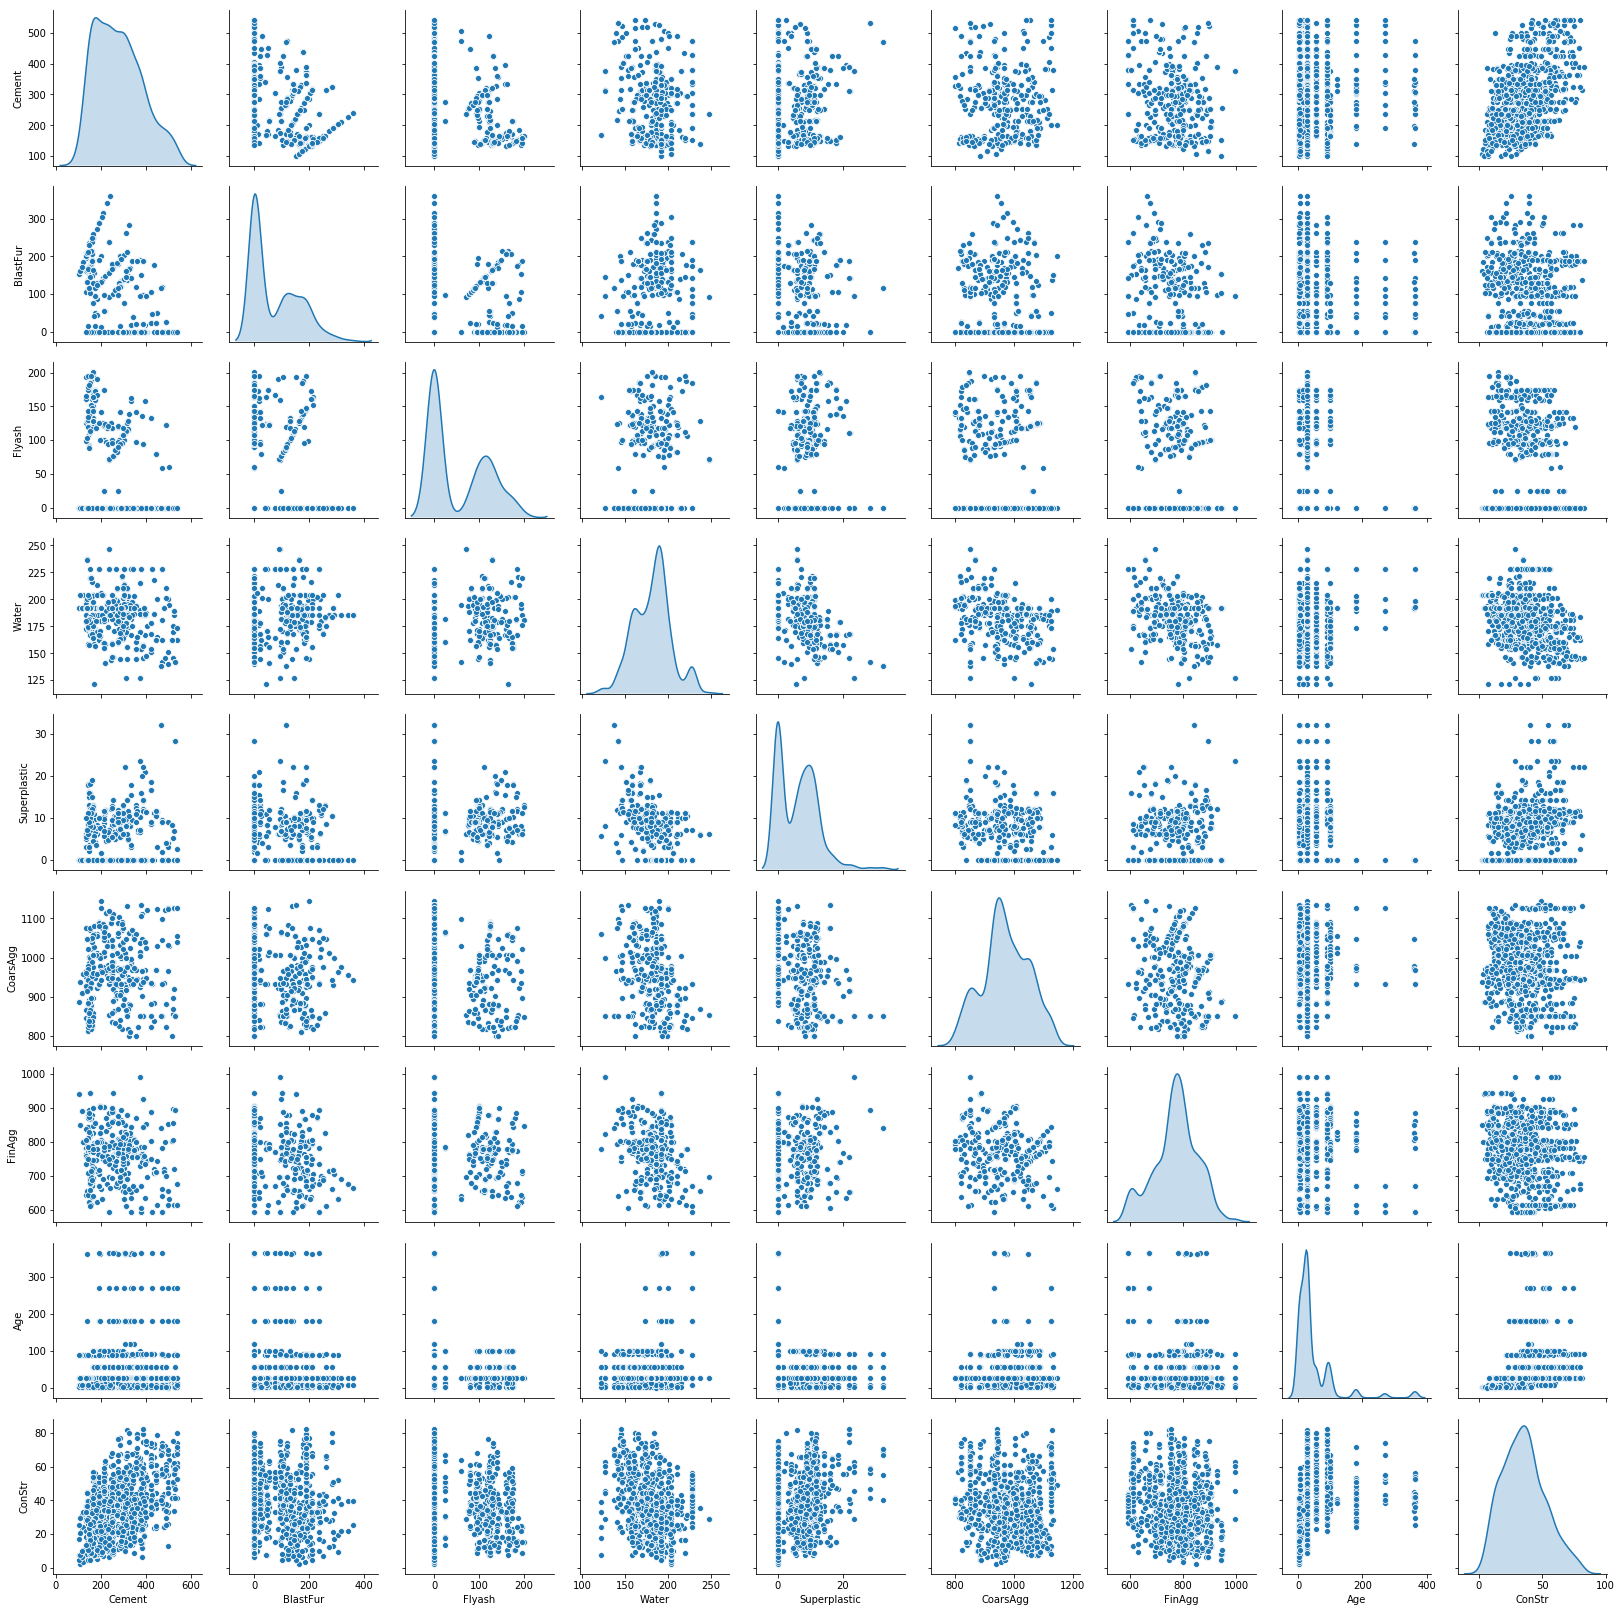

In [16]:
sns.pairplot(con,diag_kind='kde')
plt.show()

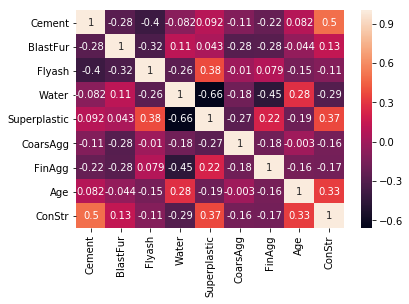

In [17]:
sns.heatmap(con.corr(),annot= True)
plt.show()

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
poly = PolynomialFeatures(degree= 2, interaction_only=True)

In [20]:
x_train_poly=poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)
x_test_poly = poly.transform(x_test)

In [21]:
linreg = LinearRegression()
linreg.fit(x_train_poly,y_train)

print('Training:\t',linreg.score(x_train_poly,y_train))
print('Validation :\t',linreg.score(x_val_poly,y_val))
print('Testing : \t', linreg.score(x_test_poly,y_test))

Training:	 0.5868132218301713
Validation :	 0.49820099553902747
Testing : 	 0.35480615971432816


In [22]:
x_train_scal = preprocessing.scale(x_train_poly)
x_val_scal = preprocessing.scale(x_val_poly)
x_test_scal = preprocessing.scale(x_test_poly)

ridge = Ridge(alpha=0.3)
ridge.fit(x_train_scal,y_train)

print('Training :\t',ridge.score(x_train_scal, y_train))
print('Validation :\t',ridge.score(x_val_scal,y_val))
print('Testing : \t', ridge.score(x_test_scal, y_test))

Training :	 0.7537163627880801
Validation :	 0.7239447203863956
Testing : 	 0.7105064522215618


In [23]:
x_test_poly

array([[1.0000000e+00, 3.3100000e+02, 0.0000000e+00, ..., 8.4152500e+05,
        9.2250000e+04, 7.3890000e+04],
       [1.0000000e+00, 3.1300000e+02, 1.4500000e+02, ..., 8.2200000e+05,
        2.8000000e+04, 2.3016000e+04],
       [1.0000000e+00, 1.9070000e+02, 0.0000000e+00, ..., 8.7636000e+05,
        1.5260000e+04, 1.1256000e+04],
       ...,
       [1.0000000e+00, 3.3900000e+02, 0.0000000e+00, ..., 7.5600800e+05,
        2.9040000e+03, 2.3430000e+03],
       [1.0000000e+00, 2.1890000e+02, 0.0000000e+00, ..., 8.5745863e+05,
        6.0407200e+04, 4.4514400e+04],
       [1.0000000e+00, 4.7500000e+02, 1.1880000e+02, ..., 6.6591615e+05,
        2.5563000e+03, 2.3445000e+03]])

In [24]:
from sklearn.utils import resample

In [25]:
values = con.values

# configure bootstrap
n_iterations = 100           # Number of bootstrap samples to create
n_size = int(len(con) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	model = linreg
	model.fit(train[:,:-1], train[:,-1])
    # evaluate model    
	score = linreg.score(test[:,:-1], test[:,-1])   # caution, overall accuracy score can mislead when classes are imbalanced
	print(score)
	stats.append(score)


0.5943756001636115
0.6072368047147152
0.5786272841477182
0.5625145007174095
0.5360390089008531
0.5499910125740186
0.5398211340882271
0.5745947259806619
0.5330110486138202
0.5803155838497756
0.5698209634556872
0.5651971899958689
0.5336432059309739
0.6065230330065716
0.5852250058780935
0.5594529840984912
0.6230854511828801
0.6006314722252062
0.5965683623133324
0.5754519116705823
0.5378717039206946
0.5238642545990475
0.5975985141905895
0.5236480945893196
0.5717008974093654
0.555886137472346
0.562305317748739
0.6114315976634941
0.5589423491964559
0.5847999125838341
0.5642148072361823
0.5723771461726321
0.5820846530439278
0.5821216108449612
0.5872122197408014
0.5700691313405857
0.5462020805025056
0.5950926286873828
0.5815093888991998
0.5839832473073657
0.5820855451521241
0.5994558828862583
0.5449366038937422
0.5870542203561806
0.5776546548962801
0.5813282942707939
0.5718183721566015
0.6047765595087636
0.6034032882718268
0.5820037094922217
0.5735936712616486
0.5935089205033914
0.605056385686

In [26]:
from matplotlib import pyplot

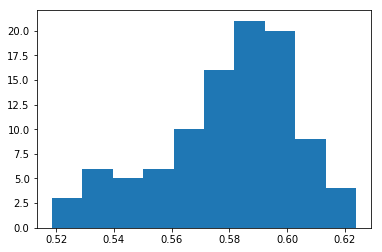

95.0 confidence interval 52.8% and 62.3%


In [27]:
# plot scores
pyplot.xticks()
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [28]:
values = con.values

# configure bootstrap
n_iterations = 100           # Number of bootstrap samples to create
n_size = int(len(con) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	model = ridge
	model.fit(train[:,:-1], train[:,-1])
    # evaluate model    
	score = model.score(test[:,:-1], test[:,-1])   # caution, overall accuracy score can mislead when classes are imbalanced
	print(score)
	stats.append(score)


0.5936906946182263
0.5723873025994899
0.6188857697896666
0.6142616835898942
0.5619411760241224
0.6014354247431819
0.5983842189691956
0.5742944249600197
0.5672485921129484
0.5582485707811168
0.5865382280996898
0.5726159364853646
0.5866012817834911
0.6103157575916299
0.5647725538337023
0.5406301672302585
0.59170661912029
0.5752631053619844
0.5805715385659345
0.5857732086538909
0.5988022927806953
0.5927754211404299
0.5724920098642603
0.6231248793456218
0.5984377415862397
0.5696132067076655
0.5355110064426092
0.5455512302088517
0.5925417575578297
0.5872109771971309
0.5826180961391126
0.6100096696047463
0.5921891684466427
0.5721119320371562
0.5950269024353833
0.5883584878959905
0.59015655063557
0.5790980898783291
0.5928422210676706
0.5596103625903494
0.5622887037430324
0.549665272279011
0.6053543155237228
0.59325826742974
0.5781543244202656
0.5681416206696759
0.614034137626638
0.5737588103399653
0.5957437290814809
0.5942752182077173
0.5859028517282714
0.5915094562666532
0.5814715675157505
0

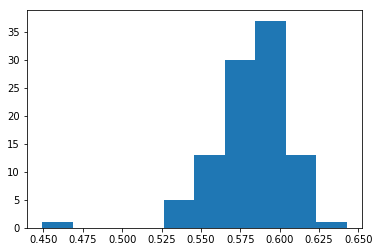

95.0 confidence interval 54.1% and 62.1%


In [29]:
# plot scores
pyplot.xticks()
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [30]:
values = con.values

# configure bootstrap
n_iterations = 100           # Number of bootstrap samples to create
n_size = int(len(con) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	model = lasso
	model.fit(train[:,:-1], train[:,-1])
    # evaluate model    
	score = model.score(test[:,:-1], test[:,-1])   # caution, overall accuracy score can mislead when classes are imbalanced
	print(score)
	stats.append(score)


0.588729519676569
0.6037516584760614
0.5831857776069509
0.6131650438462102
0.5401587371050651
0.605962617184957
0.6143644068692025
0.6252300478037258
0.5947919164189115
0.5990410806632191
0.5936878099404961
0.5613408721980049
0.59518254614693
0.5594365386080431
0.6130157160880882
0.5704426874584965
0.5636297626625653
0.5627563424267376
0.5780293293822447
0.5891994437692327
0.5884957559002475
0.5617000240866281
0.6027076142312618
0.5887461309634519
0.530742322715402
0.5549431614909353
0.6072735552333827
0.5895346302543063
0.5904116199918473
0.5587096777354777
0.5801112366512022
0.5606134382236827
0.5954078927287709
0.5887329744197285
0.5401247545893357
0.6187899074403997
0.5675940432998364
0.5919594420378995
0.6121381411078053
0.557256493498595
0.4837397158576521
0.5870755386816753
0.6019507328391859
0.5526001544797596
0.592984214369277
0.5718775108594545
0.5556848241975463
0.6125097928579115
0.590085734450289
0.5922352345385951
0.5880644746180235
0.587091026578451
0.5564490524549981
0.

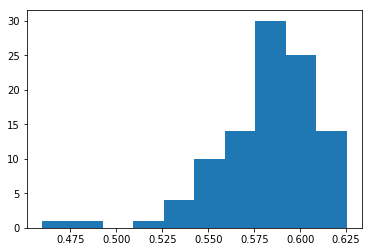

95.0 confidence interval 52.8% and 61.8%


In [31]:
# plot scores
pyplot.xticks()
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
dtmodel = DecisionTreeRegressor()
dtmodel.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [38]:
dtmodel.score(x_train,y_train)

0.9995094371500363

In [39]:
dtmodel.score(x_val,y_val)

0.8003196429423096

In [40]:
dtmodel.score(x_test,y_test)

0.8145929582112872

In [65]:

param_grid = { 'max_depth' : list(range(1,11)) }


In [66]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(dtmodel,param_grid,cv=10)

In [67]:
gs.fit(x_train,y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
gs.best_params_

{'max_depth': 10}

In [62]:
from scipy.stats import randint as sp_randint
param_dist = {"max_depth": sp_randint(1, 11),
              }

In [63]:
from sklearn.model_selection import RandomizedSearchCV
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(dtmodel, param_distributions=param_dist, n_iter=samples)

In [64]:
randomCV.fit(x_train,y_train)

print(randomCV.best_params_)

{'max_depth': 10}


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [73]:
print(pd.DataFrame(dtmodel.feature_importances_,columns=["imp"],index=x_train.columns))

                   imp
Cement        0.313169
BlastFur      0.080567
Flyash        0.016318
Water         0.124868
Superplastic  0.081916
CoarsAgg      0.017656
FinAgg        0.043262
Age           0.322244


0.9752919265852829

0.9017853303048282

0.8853218474932368

In [89]:
x=con.iloc[:,[0,1,3,4,7]]
y=con.iloc[:,8]

In [94]:
x_temp, x_test, y_temp, y_test = train_test_split(x,y, test_size=0.3, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_temp,y_temp, test_size=0.3, random_state=1)

dtmodel = DecisionTreeRegressor()
dtmodel.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [95]:
dtmodel.score(x_train,y_train)

0.9944076919492276

In [96]:
dtmodel.score(x_val,y_val)

0.850871172450796

In [97]:
dtmodel.score(x_test,y_test)

0.8505994326293518

In [104]:
from sklearn.ensemble import BaggingRegressor
bgcl = BaggingRegressor(base_estimator=dtmodel, n_estimators=50 , random_state=1)  
bgcl.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=None, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [105]:
bgcl.score(x_train,y_train)

0.9752919265852829

In [106]:
bgcl.score(x_val,y_val)

0.9017853303048282

In [111]:
from sklearn.ensemble import GradientBoostingRegressor
gbcl = GradientBoostingRegressor(n_estimators = 50, random_state=1)
gbcl = gbcl.fit(x_train,y_train)
gbcl.score(x_val,y_val)

0.8798924013937236

In [113]:
from sklearn.ensemble import RandomForestRegressor
rfcl = RandomForestRegressor(n_estimators = 50, random_state=1)
rfcl = rfcl.fit(x_train,y_train)
rfcl.score(x_val,y_val)

0.8993728895679745

In [143]:
param_grid = { 'max_depth' : list(range(1,50)),'n_estimators':list(range(1,100)) }

In [144]:
from sklearn.model_selection import RandomizedSearchCV
samples = 10 
randomCV = RandomizedSearchCV(rfcl, param_distributions=param_dist, n_iter=samples)

In [148]:
randomCV.fit(x_train,y_train)

print(randomCV.best_params_)
#print(randomCV.get_params())

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 9}


In [154]:
nrfcl = RandomForestRegressor(n_estimators = 50,max_depth=9)
nrfcl = nrfcl.fit(x_train,y_train)
nrfcl.score(x_val,y_val)

0.9001118177244523

In [152]:
nrfcl.score(x_test,y_test)

0.8816556537921824